In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import nltk

In [2]:
spam =pd.read_csv("../data/spam.csv")

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte

In [3]:
# You might have seen this error message before; 
# there are symbols in the data file that are invalid 
# unicode characters.  Apparently this file isn't
# in unicode. 

In [4]:
spam =pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam.iloc[:,3].value_counts()

 MK17 92H. 450Ppw 16"                         2
GE                                            2
 \"OH No! COMPETITION\". Who knew             1
whoever is the KING\"!... Gud nyt"            1
IåÕL CALL U\""                                1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
 why to miss them                             1
i wil tolerat.bcs ur my someone..... But      1
 TX 4 FONIN HON                               1
Name: Unnamed: 3, dtype: int64

In [7]:
spam.iloc[0]

v1                                                          ham
v2            Go until jurong point, crazy.. Available only ...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 0, dtype: object

In [8]:
spamclean = []
for line in open("spam.csv", encoding="latin-1"):
        a = line.find(",")
        spamclean.append((line[0:a], line[a+1:]))

In [9]:
spam = pd.DataFrame(spamclean)

In [10]:
spam = spam.drop(labels=0, axis=0)  #only do this once

In [11]:
spam

,0,1
1,ham,"""Go until jurong point, crazy.. Available only..."
2,ham,"Ok lar... Joking wif u oni...,,,\n"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5570,spam,"""This is the 2nd time we have tried 2 contact ..."
5571,ham,"Will Ì_ b going to esplanade fr home?,,,\n"
5572,ham,"""Pity, * was in mood for that. So...any other ..."
5573,ham,The guy did some bitching but I acted like i'd...


In [12]:
spam =spam.rename({0: "label", 1:"text"}, axis=1)

In [13]:
s1 = spam.query("label == 'ham'")

In [14]:
s2 = spam.query("label == 'spam'")

In [15]:
s1text = s1.text.str.cat()
s2text = s2.text.str.cat()

In [16]:
tok1 = nltk.word_tokenize(s1text)
tok2 = nltk.word_tokenize(s2text)

In [17]:
d1 = nltk.FreqDist(tok1)
d2 = nltk.FreqDist(tok2)

In [18]:
d1

FreqDist({',': 15969, '.': 2952, "''": 2550, 'I': 1917, 'you': 1688, 'to': 1546, '?': 1375, '...': 1139, 'the': 1032, 'a': 977, ...})

In [19]:
d1.N(), d2.N()  # These look like number of token counts

(100274, 23616)

In [20]:
len(d1.keys()), len(d2.keys()) # and these look like the number of distinct tokens.

(9524, 3756)

In [21]:
teststring = "Hey, what's up rich?"

In [22]:
for token in nltk.word_tokenize(teststring):
    print(token, '\t', end="" )
    print(d1[token] , '\t',  d1.N(),'\t', d2[token], 
          '\t', d2.N())

Hey 	89 	 100274 	 5 	 23616
, 	15969 	 100274 	 2612 	 23616
what 	146 	 100274 	 14 	 23616
's 	422 	 100274 	 68 	 23616
up 	260 	 100274 	 19 	 23616
rich 	3 	 100274 	 0 	 23616
? 	1375 	 100274 	 175 	 23616


In [38]:
def score(instring):
    tokens = nltk.word_tokenize(instring)
    overall = 1
    for i in tokens:
        # print(d1[i], d2[i])
        if d2[i] != 0 :
            score = d1[i ] / 100274 * 23616 / d2[i]
        else:
            score = 1/20
     #   print(i, score)
        overall = overall * score
    return(overall)

In [33]:
score("Free viagra, call now!")

Free 0.022429970452389026
viagra 0.05
, 1.4398675653212494
call 0.25440624240383486
now 0.414299563720952
! 0.3681807626918756


6.26649340726028e-05

In [ ]:
c = 0
for token in nltk.word_tokenize(teststring):
    c += np.log (d1[token] / d1.N() )/np.log(2) - np.log(d2[token] / d2.N())/np.log(2)
    print(token, np.log (d1[token] / d1.N() )/np.log(2) - np.log(d2[token] / d2.N())/np.log(2)) 
print(c, 2**c)


In [ ]:
teststring2 ="Click here to unsubscribe free!"
c2 = 0
for token in nltk.word_tokenize(teststring2):
    c2 += np.maximum(-np.log(20)/np.log(2), np.log (d1[token] / d1.N() )/np.log(2) - np.log(d2[token] / d2.N())/np.log(2))
    print(token, np.log (d1[token] / d1.N() )/np.log(2) - np.log(d2[token] / d2.N())/np.log(2)) 
print(c2, 2**c2)

In [39]:
scores1 = []
for d in s1.text:
    scores1.append(score(d))
scores2 = []
for d in s2.text:
    scores2.append(score(d))

TypeError: '<' not supported between instances of 'list' and 'float'

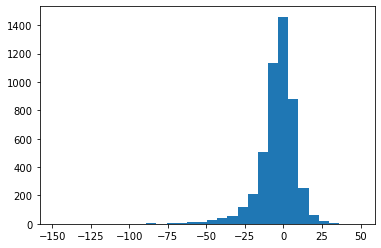

In [47]:
plt.hist(np.log(scores1), bins=30)
scores2[scores2< 1E4] = 1E-4
min(scores2)
#plt.hist(np.log(scores2), bins=30)

In [ ]:

for token in tok1:
    